In [28]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
from numpy.linalg import norm
import time
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler

%matplotlib inline
class ReadData(object):
    def __init__(self,datasetName='Iris.csv'):
        self.datasetName=datasetName
    def readData(self):
        df = pd.read_csv('Iris.csv')   
        df = df.drop(['Id'],axis=1)
        #rows = list(range(100,150))
        #df = df.drop(df.index[rows]) 
        Y = []
        target = df['Species']
        for val in target:
            if(val == 'Iris-setosa'):
                Y.append(0)
            elif(val=='Iris-versicolor'):
                Y.append(1)
            else:
                Y.append(2)
        df = df.drop(['Species'],axis=1)
        X = df.values.tolist()
        X=np.array(X)
        return X
r=ReadData()
X=r.readData()

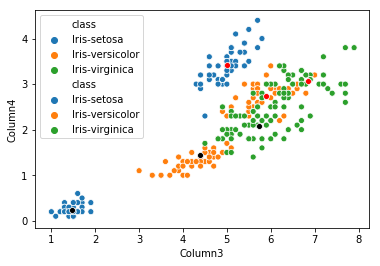

In [47]:
class KMeans(object):
    def __init__(self,numClusters,numIterations=1000,isTrain=True,randomState=123):
        self.numClusters=numClusters
        self.numIterations=numIterations
        self.isTrain=isTrain
        self.randomState=randomState
    def initializeCentroids(self,X):#create random centroids
        np.random.RandomState(self.randomState)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.numClusters]]
        return centroids
    #def updateCentrois(X,labels):
    def getDistanceBetweenPointsAndCentroids(self,X,centroids):#using ecuclidean distance ||x-c||^2
        distance = np.zeros((X.shape[0], self.numClusters))
        for k in range(self.numClusters):
            distance[:, k] =np.square(norm(X - centroids[k, :], axis=1))
        return distance
    def getClosestCluster(self, distance):#function for set labels to cluster 
        return np.argmin(distance, axis=1)
    def updateCentroids(self, X, labels):#update new centroids
        centroids = np.zeros((self.numClusters, X.shape[1]))
        for k in range(self.numClusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
    def fit(self, X):
        self.centroids = self.initializeCentroids(X)
        for i in range(self.numIterations):
            oldCentroids = self.centroids
            distance = self.getDistanceBetweenPointsAndCentroids(X, oldCentroids)
            self.labels = self.getClosestCluster(distance)
            self.centroids = self.updateCentroids(X, self.labels)
            if np.all(oldCentroids == self.centroids):
                break
        return  self.centroids
def dataVizualizationSepalLenghtWidth(centroids):
    iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    dataset = pd.DataFrame({'Column1':centroids[:,0],'Column2':centroids[:,1],'Column3':centroids[:,2],'Column4':centroids[:,3]})
    sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)
    sns.scatterplot(x='Column1', y='Column2', data=dataset,color="red")
def dataVizualizationPetalLenghtWidth(centroids):
    #current_palette = sns.color_palette()
    #sns.palplot(current_palette)
    iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
    dataset = pd.DataFrame({'Column1':centroids[:,0],'Column2':centroids[:,1],'Column3':centroids[:,2],'Column4':centroids[:,3]})
    sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=iris)
    sns.scatterplot(x='Column3', y='Column4', data=dataset,color="black")
if __name__=='__main__':
    km=KMeans(3)
    centroids=km.fit(X)
    dataVizualizationSepalLenghtWidth(centroids)
    dataVizualizationPetalLenghtWidth(centroids)